# Downloading the dataset

### Automatic installation:

1. Download kaggle api token
   - Go to https://www.kaggle.com/settings/account and scroll until you see 'Create New Token'
2. Move kaggle.json to ~/.kaggle
   - Run command `mv kaggle.json ~/.kaggle && chmod 600 ~/.kaggle/kaggle.json`
3. Join competition
   - Go to https://www.kaggle.com/competitions/widsdatathon2025/data and join competition

### Manual installation:

1. Join competition
   - Go to https://www.kaggle.com/competitions/widsdatathon2025/data and join competition
2. Download dataset
3. Unzip and move contents to `./data` directory


In [232]:
import os

DATA_DIR = './data'
COMPETITION_NAME = 'widsdatathon2025'

if not os.path.isdir(DATA_DIR):
    import kaggle
    import zipfile

    kaggle.api.authenticate()
    kaggle.api.competition_download_files(competition=COMPETITION_NAME)
    
    zip_path = f'{COMPETITION_NAME}.zip'
    with zipfile.ZipFile(zip_path, 'r') as zip:
        zip.extractall(DATA_DIR)
    os.remove(zip_path)

In [233]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

TRAIN_DIR = DATA_DIR + '/TRAIN_NEW'

categorical_df = pd.read_excel(TRAIN_DIR + '/TRAIN_CATEGORICAL_METADATA_new.xlsx')
quantitative_df = pd.read_excel(TRAIN_DIR + '/TRAIN_QUANTITATIVE_METADATA_new.xlsx')
connectome_df = pd.read_csv(TRAIN_DIR + '/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')

with open("categorical_labels.json", "r") as file:
    categorical_labels = json.load(file)

# json cant store keys of type int, cast int keys back to int
categorical_labels = {category: {int(key): label for key, label in mapping.items()} for category, mapping in categorical_labels.items()}

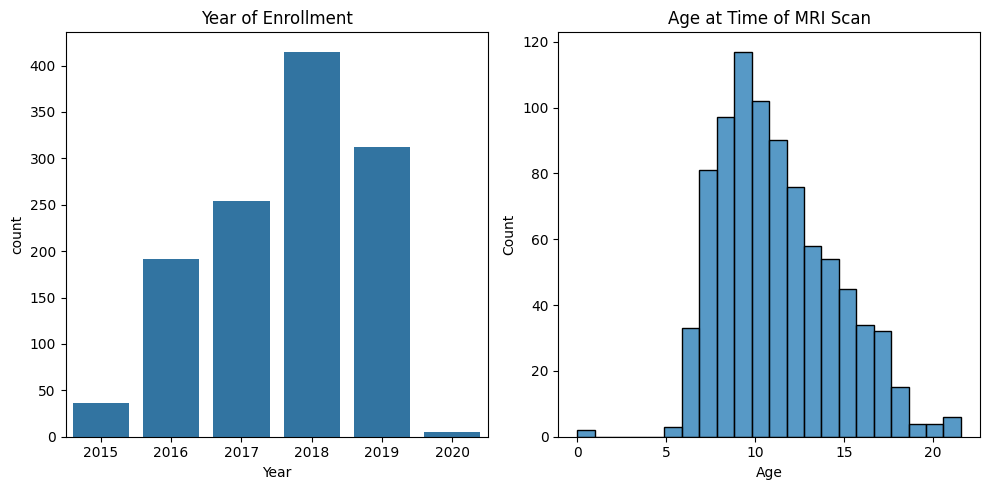

In [254]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = iter(axes)

ax = next(axes)
ax.set_title('Year of Enrollment')
sns.countplot(x='Basic_Demos_Enroll_Year', data=categorical_df, ax=ax)
ax.set_xlabel('Year')

ax = next(axes)
ax.set_title('Age at Time of MRI Scan')
sns.histplot(quantitative_df['MRI_Track_Age_at_Scan'], ax=ax)
ax.set_xlabel('Age')

fig.tight_layout()

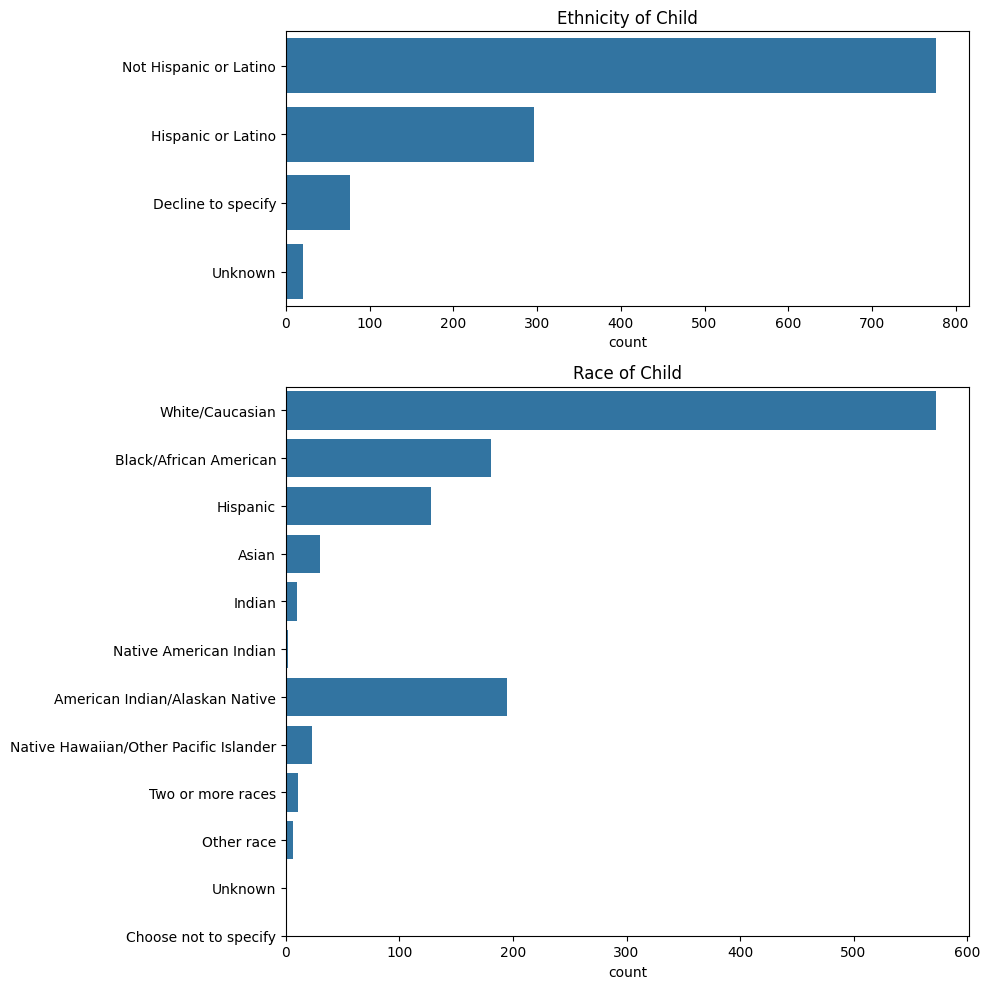

In [260]:
fig, axes = plt.subplots(2, figsize=(10, 10), height_ratios=[1, 2])
axes = iter(axes)

ax = next(axes)
ax.set_title('Ethnicity of Child')
sns.countplot(y='PreInt_Demos_Fam_Child_Ethnicity', data=categorical_df, ax=ax)
labels = categorical_labels['PreInt_Demos_Fam_Child_Ethnicity'].values()
ax.set_yticks(range(len(labels)), labels)
ax.set_ylabel(None)

ax = next(axes)
ax.set_title('Race of Child')
sns.countplot(y='PreInt_Demos_Fam_Child_Race', data=categorical_df, ax=ax)
labels = categorical_labels['PreInt_Demos_Fam_Child_Race'].values()
ax.set_yticks(range(len(labels)), labels)
ax.set_ylabel(None)

fig.tight_layout()

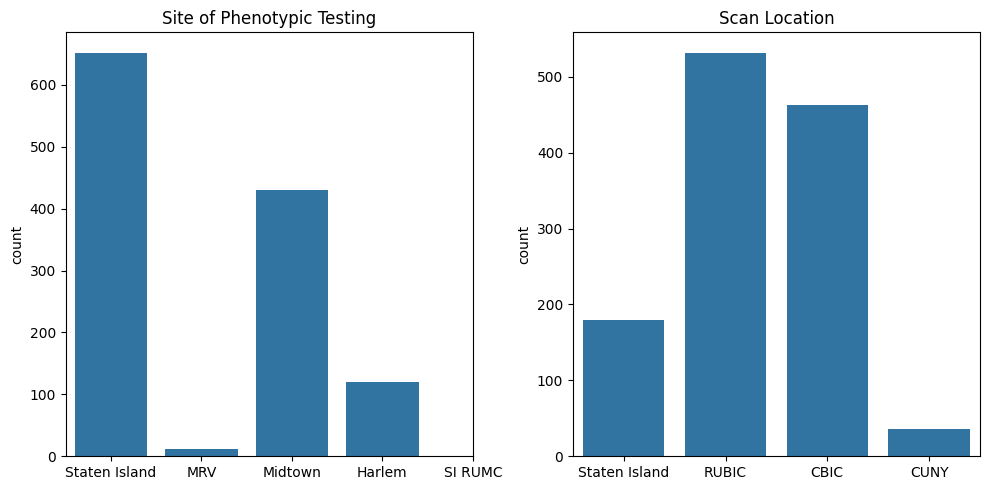

In [253]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = iter(axes)

ax = next(axes)
ax.set_title('Site of Phenotypic Testing')
sns.countplot(x='Basic_Demos_Study_Site', data=categorical_df, ax=ax)
labels = categorical_labels['Basic_Demos_Study_Site'].values()
ax.set_xticks(range(len(labels)), labels)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Scan Location')
sns.countplot(x='MRI_Track_Scan_Location', data=categorical_df, ax=ax)
labels = categorical_labels['MRI_Track_Scan_Location'].values()
ax.set_xticks(range(len(labels)), labels)
ax.set_xlabel(None)

fig.tight_layout()

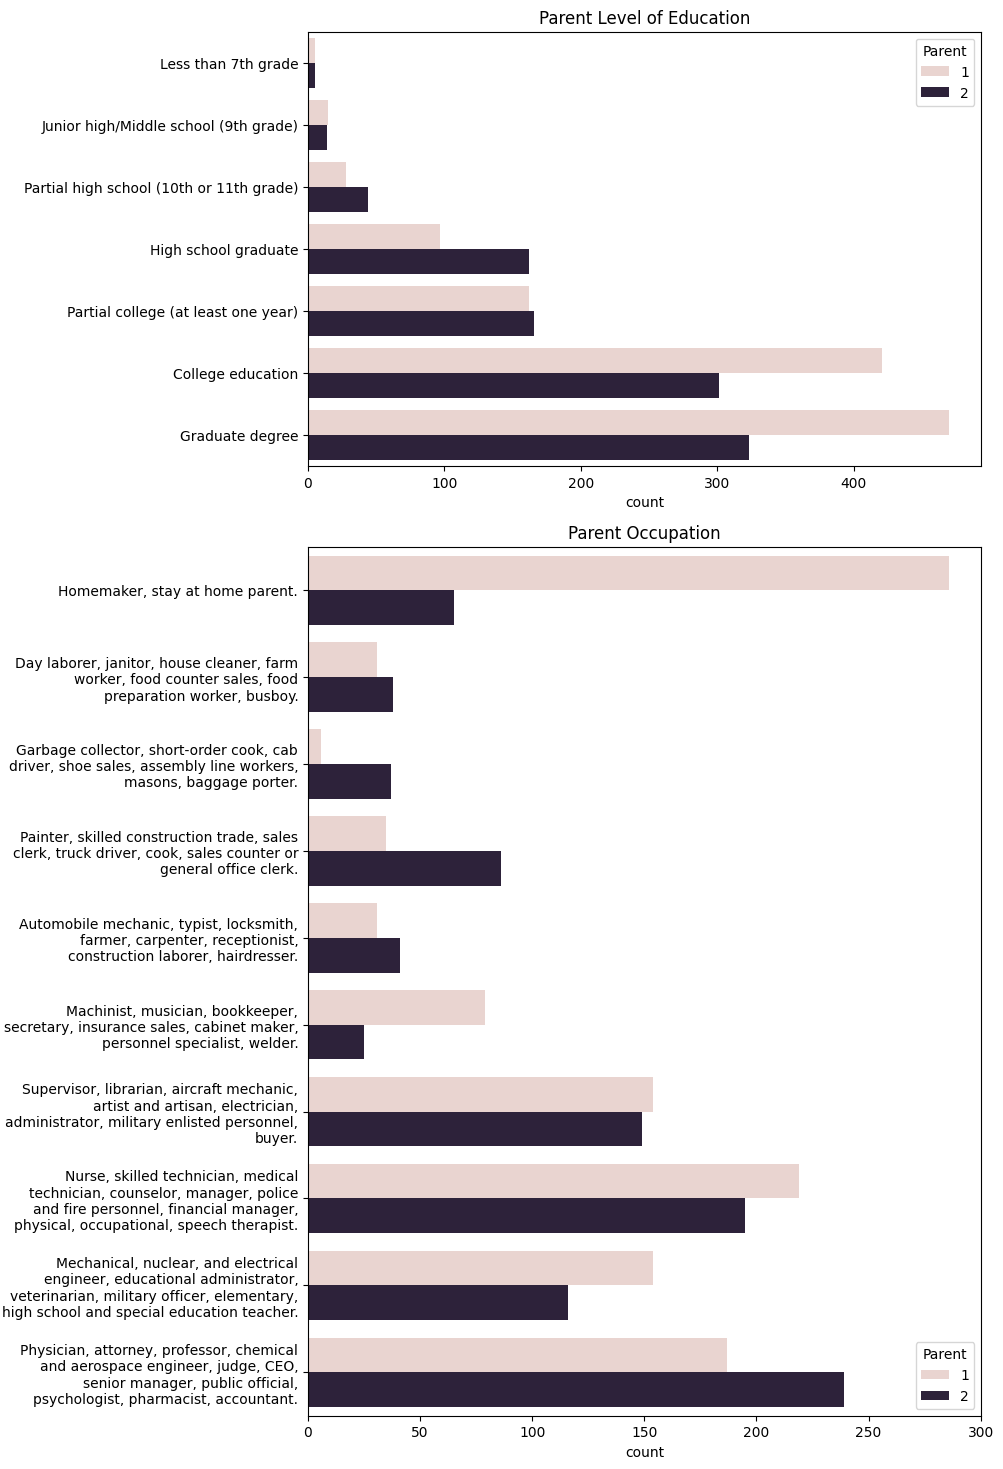

In [252]:
parent_edu_df = categorical_df.melt(
    value_vars=['Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P2_Edu'],
    var_name="Parent", value_name="Barratt_Edu"
)

parent_occ_df = categorical_df.melt(
    value_vars=['Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Occ'],
    var_name="Parent", value_name="Barratt_Occ"
)

parent_edu_df["Parent"] = parent_edu_df["Parent"].map({"Barratt_Barratt_P1_Edu": 1,"Barratt_Barratt_P2_Edu": 2,})
parent_occ_df["Parent"] = parent_occ_df["Parent"].map({"Barratt_Barratt_P1_Occ": 1, "Barratt_Barratt_P2_Occ": 2})

fig, axes = plt.subplots(2, figsize=(10, 15), height_ratios=[1, 2])
axes = iter(axes)

ax = next(axes)
ax.figure
ax.set_title("Parent Level of Education")
sns.countplot(y='Barratt_Edu', hue='Parent', data=parent_edu_df, ax=ax)
labels = categorical_labels['Barratt_Edu'].values()
ax.set_yticks(range(len(labels)), labels)
ax.set_ylabel(None)

ax = next(axes)
ax.set_title("Parent Occupation")
sns.countplot(y='Barratt_Occ', hue='Parent', data=parent_occ_df, ax=ax)
labels = categorical_labels['Barratt_Occ'].values()
ax.set_yticks(range(len(labels)), labels, wrap=True)
ax.set_ylabel(None)

fig.tight_layout()